# Deep Learning: A Simple Example

- Let's get back to the Name Gender Classifier.

![](../images/keras-workflow.png)

## Prepare Data

In [1]:
import numpy as np
import nltk
from nltk.corpus import names
import random

In [2]:
labeled_names = ([(name, 1) for name in names.words('male.txt')] +
                 [(name, 0) for name in names.words('female.txt')])
random.shuffle(labeled_names)

## Train-Test Split

In [3]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(labeled_names, test_size = 0.2, random_state=42)
print(len(train_set), len(test_set))

6355 1589


## Prepare Input and Output Tensors

- In deep learning, words or characters are automatically converted into numeric representations.
- In other words, the feature engineering step is fully automatic.

- Steps:
    - Text to Integers
    - Padding each instance to be of same lengths
    

In [4]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import SpatialDropout1D

In [5]:
names = [n for (n, l) in train_set]
labels = [l for (n, l) in train_set] 

In [6]:
len(names)

6355

### Tokenizer

In [7]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(names)

### Text to Sequences

In [8]:
names_ints = tokenizer.texts_to_sequences(names)

In [9]:
print(names[:10])
print(names_ints[:10])
print(labels[:10])

['Minda', 'Alecia', 'Issy', 'Jaine', 'Darleen', 'Olaf', 'Melba', 'Zabrina', 'Bennie', 'Morse']
[[12, 3, 4, 10, 1], [1, 6, 2, 14, 3, 1], [3, 9, 9, 11], [19, 1, 3, 4, 2], [10, 1, 5, 6, 2, 2, 4], [7, 6, 1, 20], [12, 2, 6, 15, 1], [24, 1, 15, 5, 3, 4, 1], [15, 2, 4, 4, 3, 2], [12, 7, 5, 9, 2]]
[0, 0, 0, 0, 0, 1, 0, 0, 1, 1]


### Vocabulary

In [10]:
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 30


In [11]:
tokenizer.word_index

{'a': 1,
 'e': 2,
 'i': 3,
 'n': 4,
 'r': 5,
 'l': 6,
 'o': 7,
 't': 8,
 's': 9,
 'd': 10,
 'y': 11,
 'm': 12,
 'h': 13,
 'c': 14,
 'b': 15,
 'u': 16,
 'g': 17,
 'k': 18,
 'j': 19,
 'f': 20,
 'v': 21,
 'p': 22,
 'w': 23,
 'z': 24,
 'x': 25,
 'q': 26,
 '-': 27,
 "'": 28,
 ' ': 29}

### Padding

Jean-Christophe


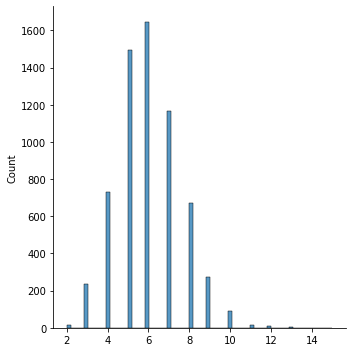

In [12]:
names_lens=[len(n) for n in names_ints]
names_lens
import seaborn as sns
sns.displot(names_lens)
print(names[np.argmax(names_lens)]) # longest name

In [13]:
max_len = names_lens[np.argmax(names_lens)]
max_len

15

In [14]:
names_ints_pad = sequence.pad_sequences(names_ints, maxlen = max_len)
names_ints_pad[:10]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  3,  4, 10,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  6,  2, 14,  3,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  9,  9, 11],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 19,  1,  3,  4,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10,  1,  5,  6,  2,  2,  4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  6,  1, 20],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  2,  6, 15,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 24,  1, 15,  5,  3,  4,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 15,  2,  4,  4,  3,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  7,  5,  9,  2]],
      dtype=int32)

## Define X and Y

In [15]:
X_train = np.array(names_ints_pad).astype('float32')
y_train = np.array(labels)

X_test = np.array(sequence.pad_sequences(
    tokenizer.texts_to_sequences([n for (n,l) in test_set]),
    maxlen = max_len)).astype('float32')
y_test = np.array([l for (n,l) in test_set])

X_test_texts = [n for (n,l) in test_set]

In [16]:
X_train.shape

(6355, 15)

In [17]:
X_train[2,]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  9.,
        9., 11.], dtype=float32)

## Model Definition

In [18]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
## Plotting results
# def plot(history):

#     matplotlib.rcParams['figure.dpi'] = 100
#     acc = history.history['accuracy']
#     val_acc = history.history['val_accuracy']
#     loss = history.history['loss']
#     val_loss = history.history['val_loss']

#     epochs = range(1, len(acc)+1)
#     ## Accuracy plot
#     plt.plot(epochs, acc, 'bo', label='Training acc')
#     plt.plot(epochs, val_acc, 'b', label='Validation acc')
#     plt.title('Training and validation accuracy')
#     plt.legend()
#     ## Loss plot
#     plt.figure()

#     plt.plot(epochs, loss, 'bo', label='Training loss')
#     plt.plot(epochs, val_loss, 'b', label='Validation loss')
#     plt.title('Training and validation loss')
#     plt.legend()
#     plt.show()

    
def plot(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    #plt.gca().set_ylim(0,1)
    plt.show()

### Model 1

- Two layers of fully-connected dense layers

In [19]:
from keras import layers
model1 = keras.Sequential()
model1.add(keras.Input(shape=(max_len,)))
model1.add(layers.Dense(128, activation="relu", name="dense_layer_1"))
model1.add(layers.Dense(128, activation="relu", name="dense_layer_2"))
model1.add(layers.Dense(2, activation="softmax", name="output"))

model1.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)


In [20]:
plot_model(model1, show_shapes=True )

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [21]:
history1 = model1.fit(X_train, y_train, 
                    batch_size=128, 
                    epochs=50, verbose=2,
                   validation_split = 0.2)

Epoch 1/50
40/40 - 1s - loss: 0.6580 - accuracy: 0.6591 - val_loss: 0.5664 - val_accuracy: 0.7238
Epoch 2/50
40/40 - 0s - loss: 0.5740 - accuracy: 0.7087 - val_loss: 0.5547 - val_accuracy: 0.7113
Epoch 3/50
40/40 - 0s - loss: 0.5526 - accuracy: 0.7272 - val_loss: 0.5385 - val_accuracy: 0.7293
Epoch 4/50
40/40 - 0s - loss: 0.5426 - accuracy: 0.7286 - val_loss: 0.5405 - val_accuracy: 0.7349
Epoch 5/50
40/40 - 0s - loss: 0.5351 - accuracy: 0.7345 - val_loss: 0.5266 - val_accuracy: 0.7238
Epoch 6/50
40/40 - 0s - loss: 0.5181 - accuracy: 0.7441 - val_loss: 0.5212 - val_accuracy: 0.7427
Epoch 7/50
40/40 - 0s - loss: 0.5103 - accuracy: 0.7461 - val_loss: 0.5101 - val_accuracy: 0.7522
Epoch 8/50
40/40 - 0s - loss: 0.4990 - accuracy: 0.7530 - val_loss: 0.5064 - val_accuracy: 0.7514
Epoch 9/50
40/40 - 0s - loss: 0.5036 - accuracy: 0.7472 - val_loss: 0.4995 - val_accuracy: 0.7427
Epoch 10/50
40/40 - 0s - loss: 0.4945 - accuracy: 0.7512 - val_loss: 0.4918 - val_accuracy: 0.7506
Epoch 11/50
40/40 -

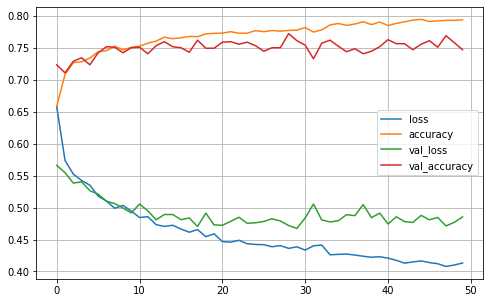

In [22]:
plot(history1)

In [23]:
model1.evaluate(X_test, y_test, batch_size=128, verbose=2)

13/13 - 0s - loss: 0.5162 - accuracy: 0.7407


[0.5161790251731873, 0.7407174110412598]

### Model 2

- One Embedding Layer + Two layers of fully-connected dense layers

In [24]:
EMBEDDING_DIM = 128
model2 = Sequential()
model2.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len, mask_zero=True))
model2.add(layers.GlobalAveragePooling1D()) ## The GlobalAveragePooling1D layer returns a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model to handle input of variable length, in the simplest way possible.
model2.add(layers.Dense(128, activation="relu", name="dense_layer_1"))
model2.add(layers.Dense(128, activation="relu", name="dense_layer_2"))
model2.add(layers.Dense(2, activation="softmax", name="output"))

model2.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

In [25]:
plot_model(model2, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [26]:
history2 = model2.fit(X_train, y_train, 
                    batch_size=128, 
                    epochs=50, verbose=2,
                    validation_split = 0.2)

Epoch 1/50
40/40 - 1s - loss: 0.6419 - accuracy: 0.6345 - val_loss: 0.5706 - val_accuracy: 0.7136
Epoch 2/50
40/40 - 0s - loss: 0.5757 - accuracy: 0.7059 - val_loss: 0.5427 - val_accuracy: 0.7349
Epoch 3/50
40/40 - 0s - loss: 0.5614 - accuracy: 0.7248 - val_loss: 0.5401 - val_accuracy: 0.7388
Epoch 4/50
40/40 - 0s - loss: 0.5552 - accuracy: 0.7266 - val_loss: 0.5363 - val_accuracy: 0.7435
Epoch 5/50
40/40 - 0s - loss: 0.5484 - accuracy: 0.7313 - val_loss: 0.5298 - val_accuracy: 0.7482
Epoch 6/50
40/40 - 0s - loss: 0.5428 - accuracy: 0.7368 - val_loss: 0.5233 - val_accuracy: 0.7592
Epoch 7/50
40/40 - 0s - loss: 0.5395 - accuracy: 0.7360 - val_loss: 0.5249 - val_accuracy: 0.7537
Epoch 8/50
40/40 - 0s - loss: 0.5334 - accuracy: 0.7406 - val_loss: 0.5237 - val_accuracy: 0.7411
Epoch 9/50
40/40 - 0s - loss: 0.5291 - accuracy: 0.7378 - val_loss: 0.5280 - val_accuracy: 0.7530
Epoch 10/50
40/40 - 0s - loss: 0.5307 - accuracy: 0.7404 - val_loss: 0.5195 - val_accuracy: 0.7561
Epoch 11/50
40/40 -

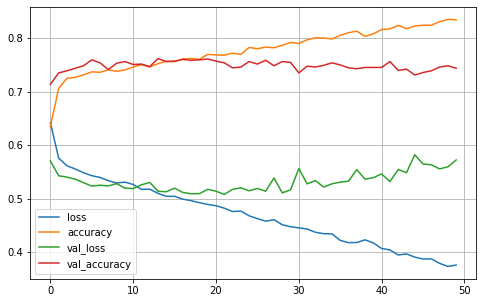

In [27]:
plot(history2)

In [28]:
model2.evaluate(X_test, y_test, batch_size=128, verbose=2)

13/13 - 0s - loss: 0.5598 - accuracy: 0.7388


[0.5598292946815491, 0.7388294339179993]

## Check Embeddings

- Compared to one-hot encodings of characters, embeddings may include more information relating to the characteristics of the characters.
- We can extract the embedding layer and apply dimensional reduction techniques (i.e., TSNE) to see how embeddings capture the relationships in-between characters.

In [29]:
ind2char = tokenizer.index_word
[ind2char.get(i) for i in X_test[10]]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'w',
 'i',
 'l',
 'm',
 'a',
 'r']

In [30]:
tokenizer.texts_to_sequences('Alvin')

[[1], [6], [21], [3], [4]]

In [31]:
char_vectors = model2.layers[0].get_weights()[0]
char_vectors.shape

(30, 128)

In [32]:
labels = [char for (ind, char) in tokenizer.index_word.items()]
labels.insert(0,None)
labels

[None,
 'a',
 'e',
 'i',
 'n',
 'r',
 'l',
 'o',
 't',
 's',
 'd',
 'y',
 'm',
 'h',
 'c',
 'b',
 'u',
 'g',
 'k',
 'j',
 'f',
 'v',
 'p',
 'w',
 'z',
 'x',
 'q',
 '-',
 "'",
 ' ']

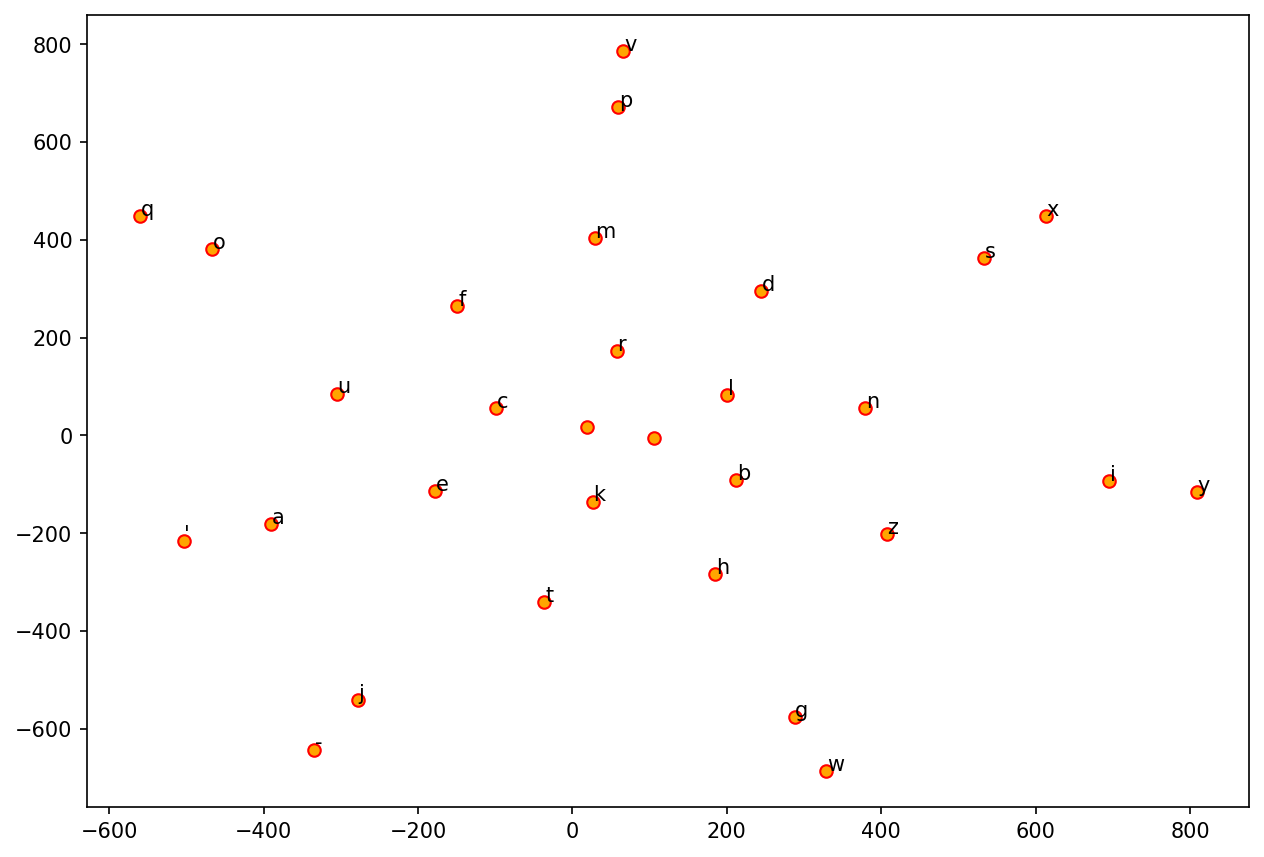

In [33]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(char_vectors)
labels = labels

plt.figure(figsize=(10, 7), dpi=150)
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

## Issues of Word/Character Representations

- One-hot encoding does not indicate semantic relationships between characters.
- For deep learning NLP, it is preferred to convert one-hot encodings of words/characters into embeddings, which are argued to include more semantic information of the tokens.
- Now the question is how to train and create better word embeddings. We will come back to this issue later.

## Hyperparameter Tuning

:::{note}

Please install keras tuner module in your current conda:
```
pip install -U keras-tuner
```

:::

- Like feature-based ML methods, neural networks also come with many hyperparameters, which require default values.
- Typical hyperparameters include:
    - Number of nodes for the layer
    - Learning Rates
- We can utilize the module, [`keras-tuner`](https://keras-team.github.io/keras-tuner/documentation/tuners/), to fine-tune the hyperparameters.

- Steps for Keras Tuner
    - First, wrap the model definition in a function, which takes a single `hp` argument. 
    - Inside this function, replace any value we want to tune with a call to hyperparameter sampling methods, e.g. `hp.Int()` or `hp.Choice()`. The function should return a compiled model.
    - Next, instantiate a tuner object specifying your optimization objective and other search parameters.
    - Finally, start the search with the `search()` method, which takes the same arguments as `Model.fit()` in keras.
    - When search is over, we can retrieve the best model and a summary of the results from the `tunner`.


In [34]:
import kerastuner

In [35]:
## Wrap model definition in a function
## and specify the parameters needed for tuning
def build_model(hp):
    model1 = keras.Sequential()
    model1.add(keras.Input(shape=(max_len,)))
    model1.add(layers.Dense(hp.Int('units', min_value=32, max_value=128, step=32), activation="relu", name="dense_layer_1"))
    model1.add(layers.Dense(hp.Int('units', min_value=32, max_value=128, step=32), activation="relu", name="dense_layer_2"))
    model1.add(layers.Dense(2, activation="softmax", name="output"))
    model1.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model1

# def build_model(hp):
#     inputs = keras.Input(shape=(784,))
#     x = layers.Dense(
#         units=hp.Int('units', min_value=32, max_value=512, step=32),
#         activation='relu'))(inputs)
#     outputs = layers.Dense(10, activation='softmax')(x)
#     model = keras.Model(inputs, outputs)
#     model.compile(
#         optimizer=keras.optimizers.Adam(
#             hp.Choice('learning_rate',
#                       values=[1e-2, 1e-3, 1e-4])),
#         loss='sparse_categorical_crossentropy',
#         metrics=['accuracy'])
#     return model

In [36]:
## This is to clean up the temp dir from the tuner
## Every time we re-start the tunner, it's better to keep the temp dir clean

import os
import shutil

if os.path.isdir('my_dir'):
    shutil.rmtree('my_dir')
    

In [37]:
## Instantiate the tunner

tuner = kerastuner.tuners.RandomSearch(
  build_model,
  objective='val_accuracy',
  max_trials=10,
  executions_per_trial=3,
  directory='my_dir')

In [38]:
## Check the tuner's search space
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [39]:
## Start tuning with the tuner
tuner.search(X_train, y_train, validation_split=0.2, batch_size=128)

Trial 8 Complete [00h 00m 01s]
val_accuracy: 0.6126409769058228

Best val_accuracy So Far: 0.7123000423113505
Total elapsed time: 00h 00m 13s
INFO:tensorflow:Oracle triggered exit


In [40]:
## Retrieve the best models from the tuner
models = tuner.get_best_models(num_models=2)

In [41]:
## Retrieve the summary of results from the tuner
tuner.results_summary()

Results summary
Results in my_dir/untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 64
learning_rate: 0.01
Score: 0.7123000423113505
Trial summary
Hyperparameters:
units: 128
learning_rate: 0.01
Score: 0.7081038554509481
Trial summary
Hyperparameters:
units: 32
learning_rate: 0.01
Score: 0.7060057719548544
Trial summary
Hyperparameters:
units: 96
learning_rate: 0.001
Score: 0.7052189707756042
Trial summary
Hyperparameters:
units: 96
learning_rate: 0.0001
Score: 0.6163126031557719
Trial summary
Hyperparameters:
units: 128
learning_rate: 0.0001
Score: 0.6131654779116312
Trial summary
Hyperparameters:
units: 32
learning_rate: 0.001
Score: 0.6126409769058228
Trial summary
Hyperparameters:
units: 64
learning_rate: 0.0001
Score: 0.5612378716468811


## Sequence Models

### Model 3

- One Embedding Layer + LSTM + Dense Layer

In [42]:
EMBEDDING_DIM = 128
model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len, mask_zero=True))
#model3.add(SpatialDropout1D(0.2))
model3.add(LSTM(64))# , dropout=0.2, recurrent_dropout=0.2))
model3.add(Dense(2, activation="softmax"))

model3.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

In [43]:
plot_model(model3, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [44]:
history3 = model3.fit(X_train, y_train, 
                    batch_size=128, 
                    epochs=50, verbose=2,
                   validation_split = 0.2)

Epoch 1/50
40/40 - 4s - loss: 0.6240 - accuracy: 0.6375 - val_loss: 0.5372 - val_accuracy: 0.7301
Epoch 2/50
40/40 - 1s - loss: 0.4987 - accuracy: 0.7457 - val_loss: 0.4313 - val_accuracy: 0.7946
Epoch 3/50
40/40 - 1s - loss: 0.4451 - accuracy: 0.7854 - val_loss: 0.4177 - val_accuracy: 0.8041
Epoch 4/50
40/40 - 1s - loss: 0.4345 - accuracy: 0.7925 - val_loss: 0.4177 - val_accuracy: 0.8017
Epoch 5/50
40/40 - 1s - loss: 0.4266 - accuracy: 0.8013 - val_loss: 0.4131 - val_accuracy: 0.8065
Epoch 6/50
40/40 - 0s - loss: 0.4258 - accuracy: 0.8029 - val_loss: 0.4150 - val_accuracy: 0.8120
Epoch 7/50
40/40 - 0s - loss: 0.4212 - accuracy: 0.8002 - val_loss: 0.4139 - val_accuracy: 0.8112
Epoch 8/50
40/40 - 0s - loss: 0.4169 - accuracy: 0.8023 - val_loss: 0.4105 - val_accuracy: 0.8025
Epoch 9/50
40/40 - 0s - loss: 0.4117 - accuracy: 0.8055 - val_loss: 0.4075 - val_accuracy: 0.8112
Epoch 10/50
40/40 - 0s - loss: 0.4091 - accuracy: 0.8047 - val_loss: 0.4050 - val_accuracy: 0.8127
Epoch 11/50
40/40 -

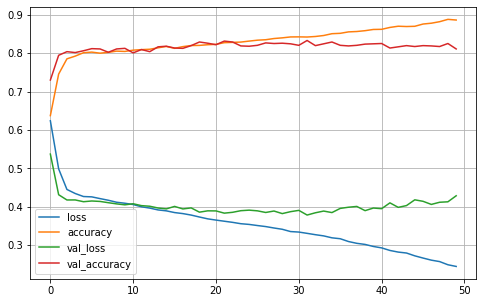

In [45]:
plot(history3)

### Model 4

- One Embedding Layer + Two Stacked LSTM + Dense Layer

In [46]:
EMBEDDING_DIM = 128
model4 = Sequential()
model4.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len, mask_zero=True))
#model.add(SpatialDropout1D(0.2))
model4.add(LSTM(64, return_sequences=True)) #, dropout=0.2, recurrent_dropout=0.2))
model4.add(LSTM(64))
model4.add(Dense(2, activation="softmax"))

model4.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

In [47]:
plot_model(model4,show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [48]:
history4 = model4.fit(X_train, y_train, 
                    batch_size=128, 
                    epochs=50, verbose=2,
                   validation_split = 0.2)

Epoch 1/50
40/40 - 7s - loss: 0.6529 - accuracy: 0.6247 - val_loss: 0.6041 - val_accuracy: 0.6625
Epoch 2/50
40/40 - 1s - loss: 0.5972 - accuracy: 0.6725 - val_loss: 0.5610 - val_accuracy: 0.7105
Epoch 3/50
40/40 - 1s - loss: 0.5138 - accuracy: 0.7417 - val_loss: 0.4421 - val_accuracy: 0.7931
Epoch 4/50
40/40 - 1s - loss: 0.4470 - accuracy: 0.7825 - val_loss: 0.4251 - val_accuracy: 0.8104
Epoch 5/50
40/40 - 1s - loss: 0.4334 - accuracy: 0.7913 - val_loss: 0.4196 - val_accuracy: 0.8120
Epoch 6/50
40/40 - 1s - loss: 0.4285 - accuracy: 0.7945 - val_loss: 0.4120 - val_accuracy: 0.8151
Epoch 7/50
40/40 - 1s - loss: 0.4252 - accuracy: 0.7937 - val_loss: 0.4067 - val_accuracy: 0.8167
Epoch 8/50
40/40 - 1s - loss: 0.4186 - accuracy: 0.7994 - val_loss: 0.4129 - val_accuracy: 0.8033
Epoch 9/50
40/40 - 1s - loss: 0.4147 - accuracy: 0.8000 - val_loss: 0.4045 - val_accuracy: 0.8112
Epoch 10/50
40/40 - 1s - loss: 0.4095 - accuracy: 0.8070 - val_loss: 0.4101 - val_accuracy: 0.8041
Epoch 11/50
40/40 -

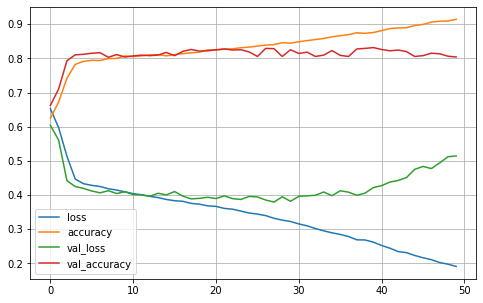

In [49]:
plot(history4)

### Model 5

- One Embedding Layer + LSTM [hidden state of last time step + cell state of last time step] + Dense Layer

In [50]:
EMBEDDING_DIM = 128

inputs = keras.Input(shape=(max_len,))
x=layers.Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len, mask_zero=True)(inputs)
#x=layers.SpatialDropout1D(0.2)(x)
x_all_h,x_last_h, x_c = layers.LSTM(64, dropout=0.2, 
                               recurrent_dropout=0.2, 
                               return_sequences=False, return_state=True)(x)
## LSTM Parameters:
#     `return_seqeunces=True`: return the hidden states for each time step
#     `return_state=True`: return the cell state of the last time step
#     When both are set True, the return values of LSTM are:
#     (1) the hidden states of all time steps (when `return_sequences=True`) or the hidden state of the last time step
#     (2) the hidden state of the last time step
#     (3) the cell state of the last time step

x = layers.Concatenate(axis=1)([x_last_h, x_c])
outputs=layers.Dense(2, activation='softmax')(x)
model5 = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

plot_model(model5, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [51]:
model5.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)
history5 = model5.fit(X_train, y_train, 
                    batch_size=128, 
                    epochs=50, verbose=2,
                   validation_split = 0.2)

Epoch 1/50
40/40 - 3s - loss: 0.6093 - accuracy: 0.6548 - val_loss: 0.5131 - val_accuracy: 0.7490
Epoch 2/50
40/40 - 1s - loss: 0.4823 - accuracy: 0.7592 - val_loss: 0.4283 - val_accuracy: 0.8017
Epoch 3/50
40/40 - 1s - loss: 0.4476 - accuracy: 0.7852 - val_loss: 0.4162 - val_accuracy: 0.8041
Epoch 4/50
40/40 - 1s - loss: 0.4352 - accuracy: 0.7954 - val_loss: 0.4152 - val_accuracy: 0.8096
Epoch 5/50
40/40 - 1s - loss: 0.4321 - accuracy: 0.7954 - val_loss: 0.4156 - val_accuracy: 0.8120
Epoch 6/50
40/40 - 1s - loss: 0.4274 - accuracy: 0.7986 - val_loss: 0.4141 - val_accuracy: 0.8096
Epoch 7/50
40/40 - 1s - loss: 0.4235 - accuracy: 0.8035 - val_loss: 0.4108 - val_accuracy: 0.8065
Epoch 8/50
40/40 - 1s - loss: 0.4235 - accuracy: 0.8043 - val_loss: 0.4105 - val_accuracy: 0.8057
Epoch 9/50
40/40 - 1s - loss: 0.4194 - accuracy: 0.8025 - val_loss: 0.4085 - val_accuracy: 0.8143
Epoch 10/50
40/40 - 1s - loss: 0.4149 - accuracy: 0.8007 - val_loss: 0.4099 - val_accuracy: 0.8112
Epoch 11/50
40/40 -

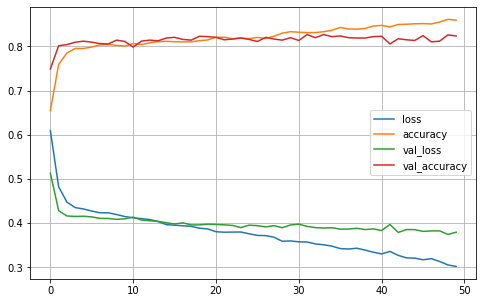

In [52]:
plot(history5)

In [53]:
model5.evaluate(X_test, y_test, batch_size=128, verbose=2)

13/13 - 0s - loss: 0.3783 - accuracy: 0.8307


[0.3782976269721985, 0.8307111263275146]

### Model 6

- Adding AttentionLayer
    - Use the hidden state h of the last time step and the cell state c of the last time step
    - Check their attention
    - And use [attention out + hidden state h of the last time step] for decision

In [54]:
EMBEDDING_DIM = 128

inputs = keras.Input(shape=(max_len,))
x=layers.Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len)(inputs)
#x=layers.SpatialDropout1D(0.2)(x)
x_all_hs, x_last_h, x_last_c = layers.LSTM(64, dropout=0.2, 
                               recurrent_dropout=0.2, 
                               return_sequences=True, return_state=True)(x)
## LSTM Parameters:
#     `return_seqeunces=True`: return the hidden states for each time step
#     `return_state=True`: return the cell state of the last time step
#     When both are set True, the return values of LSTM are:
#     (1) the hidden state of the last time step
#     (2) the hidden states of all time steps (when `return_sequences=True`) or the hidden state of the last time step
#     (3) the cell state of the last time step


atten_out = layers.Attention()([x_last_h, x_last_c])

x = layers.Concatenate(axis=1)([x_last_h, atten_out])
outputs=layers.Dense(2, activation='softmax')(x)
model6 = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

plot_model(model6, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [55]:
model6.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)
history6 = model6.fit(X_train, y_train, 
                    batch_size=128, 
                    epochs=50, verbose=2,
                   validation_split = 0.2)

Epoch 1/50
40/40 - 3s - loss: 0.6504 - accuracy: 0.6216 - val_loss: 0.5934 - val_accuracy: 0.6688
Epoch 2/50
40/40 - 1s - loss: 0.5516 - accuracy: 0.7101 - val_loss: 0.4754 - val_accuracy: 0.7663
Epoch 3/50
40/40 - 1s - loss: 0.4713 - accuracy: 0.7754 - val_loss: 0.4312 - val_accuracy: 0.7876
Epoch 4/50
40/40 - 1s - loss: 0.4493 - accuracy: 0.7785 - val_loss: 0.4173 - val_accuracy: 0.8009
Epoch 5/50
40/40 - 1s - loss: 0.4400 - accuracy: 0.7870 - val_loss: 0.4161 - val_accuracy: 0.8041
Epoch 6/50
40/40 - 1s - loss: 0.4343 - accuracy: 0.7962 - val_loss: 0.4129 - val_accuracy: 0.8049
Epoch 7/50
40/40 - 1s - loss: 0.4279 - accuracy: 0.7956 - val_loss: 0.4111 - val_accuracy: 0.8049
Epoch 8/50
40/40 - 1s - loss: 0.4239 - accuracy: 0.7988 - val_loss: 0.4085 - val_accuracy: 0.8057
Epoch 9/50
40/40 - 1s - loss: 0.4180 - accuracy: 0.7998 - val_loss: 0.4044 - val_accuracy: 0.8041
Epoch 10/50
40/40 - 1s - loss: 0.4148 - accuracy: 0.8037 - val_loss: 0.4022 - val_accuracy: 0.8112
Epoch 11/50
40/40 -

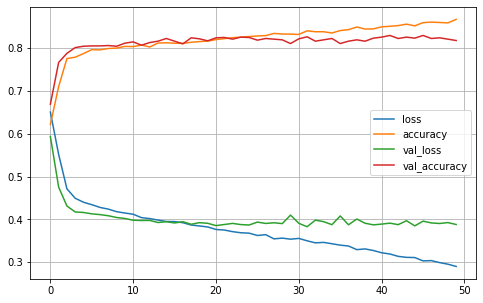

In [56]:
plot(history6)

## Explanation

In [57]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=['female','male'], char_level=True)

In [58]:
def model_predict_pipeline(text):
    _seq = tokenizer.texts_to_sequences(text)
    _seq_pad = keras.preprocessing.sequence.pad_sequences(_seq, maxlen=max_len)
    #return np.array([[float(1-x), float(x)] for x in model.predict(np.array(_seq_pad))])
    return model1.predict(np.array(_seq_pad))



# np.array(sequence.pad_sequences(
#     tokenizer.texts_to_sequences([n for (n,l) in test_set]),
#     maxlen = max_len)).astype('float32')

In [59]:
reversed_word_index = dict([(index, word) for (word, index) in tokenizer.word_index.items()])

In [60]:
text_id =305

In [61]:
X_test[text_id]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 2., 4., 7., 5., 2.],
      dtype=float32)

In [62]:
X_test_texts[text_id]

'Lenore'

In [63]:
' '.join([reversed_word_index.get(i, '?') for i in X_test[text_id]])

'? ? ? ? ? ? ? ? ? l e n o r e'

In [64]:
print(X_test[22])
print(X_test_texts[22])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  5.  7. 12.  1.  4.]
Roman


In [65]:
X_test_texts[text_id]

'Lenore'

In [66]:
model_predict_pipeline([X_test_texts[text_id]])

array([[0.793676  , 0.20632392]], dtype=float32)

In [67]:
exp = explainer.explain_instance(
X_test_texts[text_id], model_predict_pipeline, num_features=100, top_labels=1)

In [68]:
exp.show_in_notebook(text=True)

In [69]:
y_test[text_id]

0

In [70]:
exp = explainer.explain_instance(
'Alvin', model_predict_pipeline, num_features=100, top_labels=1)
exp.show_in_notebook(text=True)

In [71]:
exp = explainer.explain_instance(
'Michaelis', model_predict_pipeline, num_features=100, top_labels=1)
exp.show_in_notebook(text=True)

In [72]:
exp = explainer.explain_instance(
'Sidney', model_predict_pipeline, num_features=100, top_labels=1)
exp.show_in_notebook(text=True)

In [73]:
exp = explainer.explain_instance(
'Timber', model_predict_pipeline, num_features=100, top_labels=1)
exp.show_in_notebook(text=True)